#Disease Prediction from Symptoms using Neural Networks

###📌 Introduction

**Goal**:

This project aims to build a machine learning model that can predict possible diseases based on a patient's symptoms. We are using a supervised classification approach with neural networks to learn from symptom-diagnosis data.

**Dataset Description:**

The dataset contains binary features for various symptoms (e.g., itching, skin rash, vomiting...) where `1` means the symptom is present and `0` means absent.

The target variable, `prognosis`, represents the actual disease.

In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

### Loading and Exploring the Dataset

In [237]:
train_set = pd.read_csv('data/Training.csv')
test_set = pd.read_csv('data/Testing.csv')

In [238]:
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


We start by checking if the dataset contains any missing (NaN) values.

In [239]:
train_set.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0
prognosis,0


We notice that the column Unnamed: 133 consists entirely of NaN entries, meaning it doesn't provide any useful information. Therefore, we drop this column from our analysis.

In [240]:
train_set.dropna(axis=1, inplace=True)
test_set.dropna(axis=1, inplace=True)

We split the data into input features X and target labels y. The input features are all symptom columns, and the target is the disease diagnosis (prognosis).

In [241]:
X_train = train_set.drop('prognosis', axis=1)
y_train = train_set['prognosis']

X_test = test_set.drop('prognosis', axis=1)
y_test = test_set['prognosis']

### Encoding Target Labels

In machine learning, models generally work with **numerical input**, not categorical text labels. Therefore, we must convert **text labels into numbers** before feeding them into a model. This process is called *encoding*.

Since the target values (prognosis) are strings, we use *LabelEncoder* a tool provided by `scikit-learn` to automatically convert each unique category into a corresponding number.

In [242]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

Number of classes: 41


### Building the Neural Network Model
We construct a basic neural network using Keras. It has:

* An input layer (defined using keras Input)
* Two hidden layers with ReLU activation function
* An output layer with softmax to predict probabilities for each class

And, we compile the model with:

* `adam` optimizer
* `sparse_categorical_crossentropy` loss (for multi-class classification with integer labels)
* `accuracy` as the evaluation metric

In [243]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the Model

Now, we train the model on the training data. We also use 20% of the data as a validation set to monitor performance during training.

In [244]:
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6377 - loss: 2.3108 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 5.1567e-04
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 2.9633e-04
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.8640e-04
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.3789e-04 - val_accuracy: 1.0000 - val_loss: 1.2746e-04
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.074

### Evaluation on Test Set

After training, we evaluate how well the model performs on completely unseen test data.

In [245]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0121    
Test Accuracy: 1.00


### Making Predictions

We use the trained model to predict the diseases from test symptoms. Then we decode the predicted classes back into disease names using the label encoder.


In [246]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

predicted_diseases = label_encoder.inverse_transform(y_pred)

actual_diseases = y_test.values

for actual, predicted in zip(actual_diseases[:10], predicted_diseases[:10]):
  print(f"Actual: {actual} - Predicted: {predicted}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Actual: Fungal infection - Predicted: Fungal infection
Actual: Allergy - Predicted: Allergy
Actual: GERD - Predicted: GERD
Actual: Chronic cholestasis - Predicted: Chronic cholestasis
Actual: Drug Reaction - Predicted: Drug Reaction
Actual: Peptic ulcer diseae - Predicted: Peptic ulcer diseae
Actual: AIDS - Predicted: AIDS
Actual: Diabetes  - Predicted: Diabetes 
Actual: Gastroenteritis - Predicted: Gastroenteritis
Actual: Bronchial Asthma - Predicted: Bronchial Asthma


### Classification Report

We use classification_report to see precision, recall, and F1-score for each class.

In [247]:
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

### Confusion Matrix

A confusion matrix helps us visualize where the model is making correct and incorrect predictions.

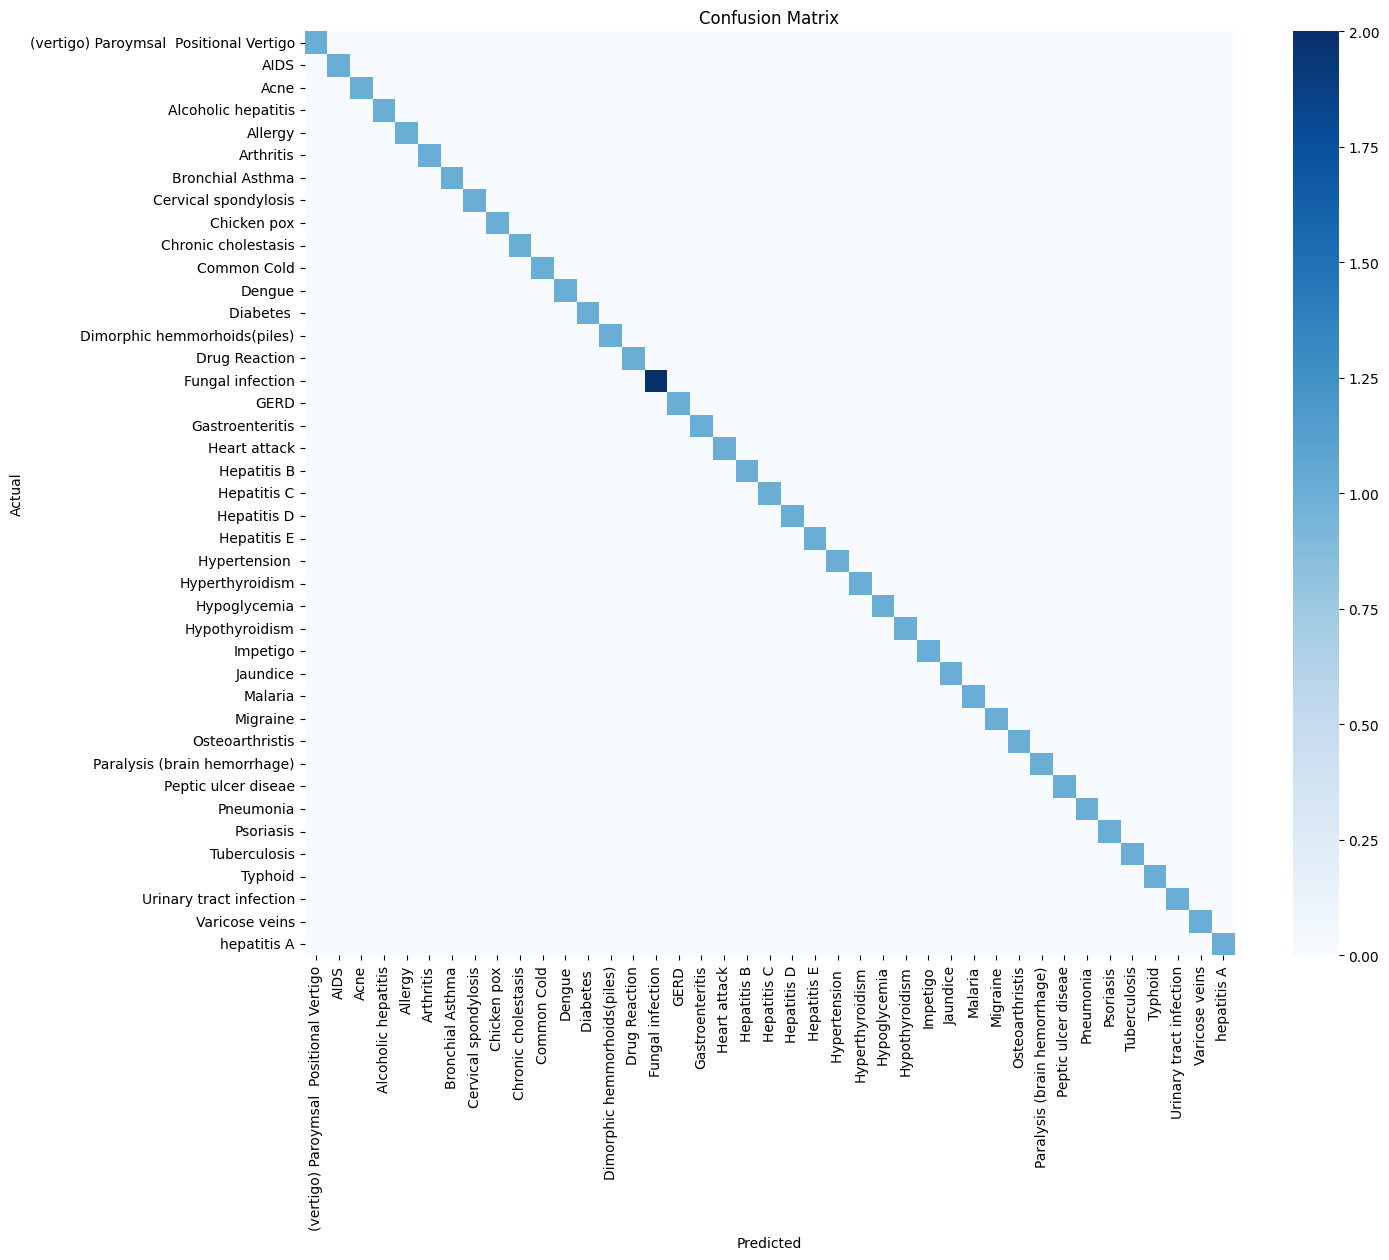

In [248]:
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(15,12))
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

We successfully trained a neural network that can predict a disease based on binary symptoms. The accuracy and precision of predictions are quite high, and the model could potentially be used in clinical decision support systems.